In [5]:
import deepxde as dde
import numpy as np


def ode_system(x, y):
    """ODE system.
    dy1/dx = -0.02*y1 + 0.02*y2
    dy2/dx = 0.02*y1 - 0.02*y2
    """
    # Most backends
    y1, y2 = y[:, 0:1], y[:, 1:]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    return [dy1_x + 0.02*y1 - 0.02*y2, dy2_x - 0.02*y1 + 0.02* y2]


def boundary(_, on_initial):
    return on_initial


def func(x):
    """
    y1 = 75 - 75*exp(-0.04*t)
    y2 = 75 + 75*exp(-0.04*t)
    """
    return np.hstack((75 - 75*np.exp(-0.04*x), 75 + 75*np.exp(-0.04*x)))


geom = dde.geometry.TimeDomain(0, 100)
ic1 = dde.icbc.IC(geom, lambda x: 0, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda x: 150, boundary, component=1)
data = dde.data.PDE(geom, ode_system, [ic1, ic2], 50, 8, solution=func, num_test=100)

layer_size = [1] + [50] * 2 + [2]
activation = "relu"
initializer = "Glorot uniform" # https://www.twblogs.net/a/5c947a10bd9eee35fc15e7d3
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

Compiling model...
Building feed-forward neural network...
'build' took 0.058990 s

'compile' took 0.545681 s

Initializing variables...
Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [1.69e-03, 2.98e-02, 0.00e+00, 2.25e+04]    [1.96e-03, 3.07e-02, 0.00e+00, 2.25e+04]    [9.45e-01]    
1000      [7.79e-01, 2.34e-01, 3.44e-05, 2.56e-03]    [1.66e-01, 1.84e-01, 3.44e-05, 2.56e-03]    [1.40e-01]    
2000      [4.46e-01, 8.20e-02, 1.20e-05, 3.76e-05]    [3.43e-02, 5.02e-02, 1.20e-05, 3.76e-05]    [6.98e-02]    
3000      [5.95e-01, 4.47e-02, 5.77e-06, 1.88e-05]    [1.38e-02, 5.28e-02, 5.76e-06, 1.88e-05]    [4.12e-02]    
4000      [5.88e-01, 4.09e-02, 6.99e-05, 1.61e-05]    [1.07e-02, 4.05e-02, 6.99e-05, 1.61e-05]    [1.59e-02]    
5000      [1.36e-02, 2.01e-02, 8.08e-06, 7.83e-07]    [1.82e-02, 2.69e-02, 8.07e-06, 7.83e-07]    [1.30e-02]    
6000      [7.85e-03, 7.12e-03, 3.11e-05, 1.05e-06]   

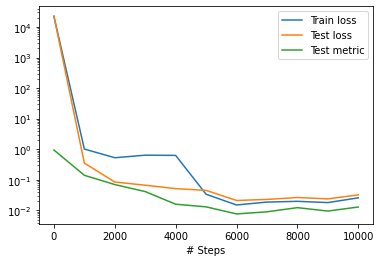

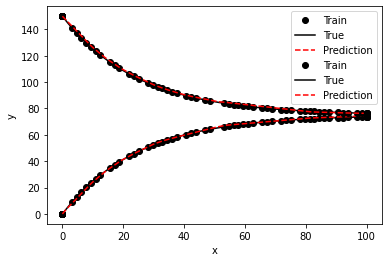

In [6]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9299761661592881739
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4176478208
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14667583227792694132
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]
